https://nbviewer.jupyter.org/github/qiskit-community/qiskit-advocate-test/blob/master/solutions/3_real_devices.ipynb

https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.job.IBMQJob.html#qiskit.providers.ibmq.job.IBMQJob

Last run job:
![Doc](resources/Job-methods-1.png)

![Doc](resources/Job-methods-2.png)

![Doc](resources/Job-methods-3.png)

In [1]:
from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()

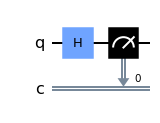

In [2]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [3]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator and x.status().operational==True))
job = execute(qc, backend = backend)
job_monitor(job)

Job Status: job has successfully run


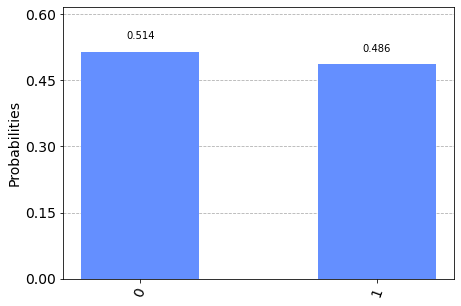

In [4]:
plot_histogram(job.result().get_counts(qc))

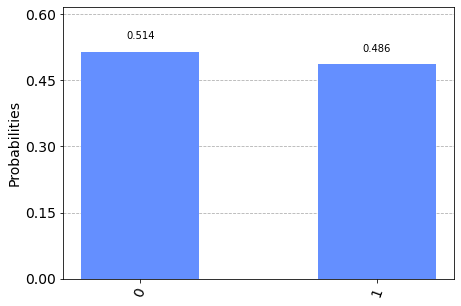

In [5]:
job = backend.jobs()[0]
plot_histogram(job.result().get_counts())

In [11]:
job.backend()

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
job.backend_options()

{'shots': 1024,
 'memory': False,
 'parameter_binds': [],
 'meas_level': 2,
 'memory_slots': 1,
 'n_qubits': 5,
 'rep_delay': 250.0,
 'init_qubits': True,
 'parametric_pulses': ['gaussian', 'gaussian_square', 'drag', 'constant']}

In [13]:
#job.cancel()
job.circuits()

In [14]:
job.error_message()

In [6]:
job.__class__

qiskit.providers.ibmq.job.ibmqjob.IBMQJob